# `analyzing-KPop`
K-pop is growing popularity, and there's no sign of stopping. With this, let's find out its various trends! Simply put, this program analyzes trends within **K-Pop idols, groups, and music videos from 1992 to 2020.** For more information, kindly read the [informational document](https://github.com/buzz-lightsnack-2007/analyzing-KPop/blob/main/ReadMe.md). 

## Load It Up!

### Loading Functions
Let's load the necessary modules and functions. **Please always run this function first.**

In [32]:
# Loading Functions
# Formatting
formatting = {
	'clear': '\033[0m',
	'color': {
		'purple': '\033[95m',
		'cyan': '\033[96m',
		'cyan_dark': '\033[36m',
		'blue': '\033[94m',
		'green': '\033[92m',
		'yellow': '\033[93m',
		'red': '\033[91m'
	},
	'font': {
		'bold': '\033[1m',
		'underline': '\033[4m'
	}
}

# Screen messages
def info_status(message):
	print(formatting['font']['bold'] + 'Status: \t' + formatting['clear'] + message)
def info_err(message):
	print(formatting['font']['bold'] + formatting['color']['red'] + '🗙 Error: \t' + formatting['clear'] + formatting['clear'] + message)
def info_warning(message):
	print(formatting['font']['bold'] + formatting['color']['yellow'] + '⚠ Warning: \t' + formatting['clear'] + formatting['clear'] + message)
def info_success(message):
	print(formatting['font']['bold'] + formatting['color']['green'] + '✓ Success: \t' + formatting['clear'] + formatting['clear'] + message)

# get unique data
def count_unique(dataset, key, display_output = True): 
	"""
		Count the unique data. 

		Parameters: 
			dataset: (dict) the dataset
			key: (str) the key name
		Returns: (dict) count of unique data
	"""

	# Create variable for dataset. 
	data_unique = {key: [], 'count': [], 'percentage': []}

	# Get the count. 
	data_unique_count = collections.Counter(dataset)

	# Get the percentages. 
	data_unique_count_percentages = {}
	for key_entry in sorted(data_unique_count.keys()): 
		data_unique_count_percentages[key_entry] = (data_unique_count[key_entry] / len(dataset))

	# Consolidate the data. 
	for key_entry in data_unique_count.keys(): 
		data_unique[key].append(key_entry)
		data_unique['count'].append(data_unique_count[key_entry]) 
		data_unique['percentage'].append((data_unique_count_percentages[key_entry] * 100))

	# Convert to pandas and display it. 
	data_unique_dataframe = pandas.DataFrame(data_unique)

	# Sort the data by descending order. 
	data_unique_dataframe.sort_values(by = 'count', ascending =  False, inplace = True)

	if (display_output): 
		# reimport module
		from IPython.display import display as output_display
		
		# Print the cleaned dataframe. 
		output_display(data_unique_dataframe)

	# Return the data. 
	return(data_unique_count)

# create graphs
def graph_create(mode: str, display_now: bool, metadata_title: str, dataset_labels: list, dataset_x: list, dataset_y = []): 
	"""
	Crete the necessary graph. 

	Parameters: 
		mode: (str) This refers to the type of graph to create. Choose between pie. 
		display_now: (bool) Do you want to display the graph now?
		metadata_title: (str) What is the title of the chart? 
		dataset_labels: (list) a list of labels
		dataset_x: (list) x values
		dataset_y: (list) y values
	Returns: the figure
	"""

	# Importing modules
	import matplotlib.pyplot as plt
    
    # Configure the graph using the metadata
	if metadata_title: 
		plt.title(metadata_title)
	
	if "pie" in mode: 
		plt.pie(list(dataset_x), labels=list(dataset_labels))
	elif "bar" in mode: 
		plt.bar(list(dataset_labels), list(dataset_x))
		
	# Get the figure. 
	graph = plt.gcf()

	# Display the output now, if needed. 
	if (display_now): 
		plt.show()
	
	# Save the figure in the output folder. 
	graph.savefig(('output/' + metadata_title + '.PDF'))

	# Return the graph. 
	return(graph)

try: 
	# Import modules. 
	import os
	import pandas
	import matplotlib
	import collections
	from IPython.display import display as output_display

except: 
	info_err("Your runtime is missing either pandas or MatPlotLib, or might be running it outside a Jupyter environment.")
	exit()
else: 
	info_success("The necessary modules have been loaded properly. ")

✓ Success: 	The necessary modules have been loaded properly. 


### Loading Files
Let's check if the files are there!

In [33]:
# Loading Files
def load_check_files(): 
	"""
		This function checks if there are any files inside the data/kpop_idols folder. 

		Parameters: none
		Returns: dictionary containing the major data folder directory and the list of CSV files
	"""
	# Create return variable. 
	directory_suggested = {}

	# Generate list of directories. Kindly change this if you placed the four files elsewhere. 
	directory_list_names_expected = ['data/', 'data/kpop_idols/']

	for directory_name in directory_list_names_expected:
		# Generate the folder's details. 
		directory_contents = sorted(os.listdir(directory_name))

		# expected contents
		directory_expected_contents = ['kpop_idols_boy_groups.csv', 'kpop_idols_girl_groups.csv', 'kpop_idols.csv', 'kpop_music_videos.csv']

		if (sorted(directory_contents) == sorted(directory_expected_contents)): 
			directory_suggested['path'] = directory_name
			directory_suggested['contents'] = directory_contents

			# Let the user know that it is working. 
			info_success(("Files found at folder " + directory_name + " relative to this file."))

			# Return the data. 
			return(directory_suggested)
		
	else: 
		info_err("Folder not found! You might have probably selected the wrong directory; in this case, you may edit the directory_list_names_expected variable. If not, make sure that the files are named properly. ")

try: 
	data_source = load_check_files()
except NameError as e: 
	print("Please always run the first function above when opening this notebook.")
except: 
	info_err("Folder not found! You might have probably selected the wrong directory; in this case, you may edit the directory_list_names_expected variable.")

✓ Success: 	Files found at folder data/kpop_idols/ relative to this file.


## Convert
Convert the list to a readable type. _You must have already run the previous two cells._

In [34]:
def data_convert(data_source): 
	"""
		Convert the data to a pandas dataframe. 

		Parameters: 
			data_source: (str)the CSV file
		Returns: dictionary of data
	"""

	# Convert to pandas data frame. 
	data_table = pandas.read_csv(data_source)
	data = data_table.to_dict('list')

	# Return the data frame. 
	return(data)

def data_convert_all(data_source): 
	"""
		Convert all of the databases. 

		Parameters: 
			data_source: (dict) containing the directory and the CSV name
		Returns: dictionary containing the datas
	"""

	# Create the database dictionary. 
	data_all = {}

	# Convert the data. 
	for data_source_CSV in data_source['contents']: 
		data_all[data_source_CSV[:-4]] = data_convert((data_source['path']+ data_source_CSV))
	
	# Return the dictionary. 
	return(data_all)

# Save the data into a database. 
database = data_convert_all(data_source)

# database as output 
database

{'kpop_idols': {'Stage Name': ['A.M',
   'Ace',
   'Aeji',
   'AhIn',
   'Ahra',
   'Ahyoung',
   'Ahyung',
   'Ailee',
   'Aini',
   'Aisha',
   'AleXa',
   'Alice',
   'Allen',
   'Amber',
   'Anne',
   'Anthony',
   'Arang',
   'Arang',
   'Ari',
   'Ari',
   'Arie',
   'Arin',
   'Aron',
   'Asahi',
   'Ashley',
   'Aurora',
   'Avin',
   'Ayno',
   'B-Bomb',
   'B-Joo',
   'B.I',
   'B.S',
   'Babysoul',
   'Bada',
   'Baekah',
   'Baekho',
   'Baekhyun',
   'BamBam',
   'Bang Chan',
   'Baro',
   'Baron',
   'BC',
   'Bekah',
   'BEL',
   'Bella',
   'Belle',
   'Benji',
   'Beomgyu',
   'Bian',
   'Bic',
   'Bin',
   'Binnie',
   'Bitsaeon',
   'Bitto',
   'Blue',
   'BM',
   'BoA',
   'Boa',
   'Bobby',
   'Bohyung',
   'Bokeun',
   'Bom',
   'Bomi',
   'Bomin',
   'Bomin',
   'Bona',
   'Boni',
   'Bora',
   'Bora',
   'Boram',
   'Bullet',
   'BX',
   'Byungchan',
   'C.A.P',
   'Cao Lu',
   'Casper',
   'Castle J',
   'Cha Hoon',
   'Chaea',
   'Chaebin',
   'Chaehyun',
   '

## On Idols
Let's gather up some statistics on the idols. 

### Surnames
How much are their surnames different? 

,surname,count,percentage
7,김,246,18.865031
3,이,183,14.033742
14,박,95,7.285276
31,정,64,4.907975
17,최,55,4.217791
...,...,...,...
53,엘,1,0.076687
90,케,1,0.076687
11,엠,1,0.076687
92,첸,1,0.076687


C:\Users\buzz-lightsnack-2007\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\buzz-lightsnack-2007\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\buzz-lightsnack-2007\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\buzz-lightsnack-2007\AppData\Local\Packages\PythonSoftwareFoundation

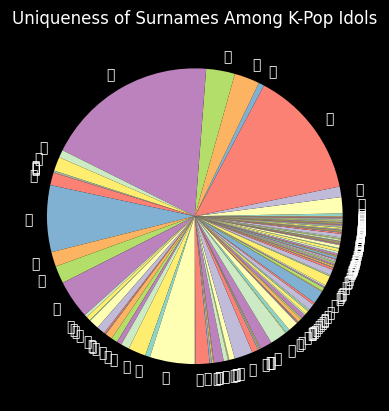

C:\Users\buzz-lightsnack-2007\AppData\Local\Temp\ipykernel_5912\497175086.py:109: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  graph.savefig(('output/' + metadata_title + '.PDF'))
C:\Users\buzz-lightsnack-2007\AppData\Local\Temp\ipykernel_5912\497175086.py:109: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  graph.savefig(('output/' + metadata_title + '.PDF'))
C:\Users\buzz-lightsnack-2007\AppData\Local\Temp\ipykernel_5912\497175086.py:109: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  graph.savefig(('output/' + metadata_title + '.PDF'))
C:\Users\buzz-lightsnack-2007\AppData\Local\Temp\ipykernel_5912\497175086.py:109: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  graph.savefig(('output/' + metadata_title + '.PDF'))
C:\Users\buzz-lightsnack-2007\AppData\Local\Temp\ipykernel_5912\497175086.py:109: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missi

In [35]:
def name_extract(name = str, section = 1): 
	"""
		Extract the specified part of the name following the East Asian naming format, which always has surnames at the front.

		Parameters: 
			name: (str) the name
			section: (int) the part of the name to use, in which "0" means no change, "1" stands for the last name while "2" stands for the first name
		Returns: cleaned name
	"""

	# Make sure that the input is correct. 
	section = abs(int(section))
	if (section > 2): 
		section = 0

	# Return the correct section of the name. 
	if section == 1: 
		return(name[0])
	elif section == 2: 
		return(name[1:3])
	else: 
		return(name)

def analyze_idol_surnames(dataset, column_name_key): 
	"""
		Analyze the surnames following the East Asian naming format.  

		Parameters: 
			dataset: the dataset containing names
			column_name_key: (str) the key of the column containing the names
		Returns: none
	"""

	# Get the specific data. 
	names = dataset[column_name_key]

	# Create the placeholder for the names. 
	names_surnames = []

	# Extract the surnames.  
	for name in names: 
		# Some names are not defined. Catch it if that occurs. 
		try: 
			names_surnames.append(name_extract(name))
		except: 
			# Skip the name. 
			pass

	# Count unique. 
	names_unique = count_unique(names_surnames, 'surname')

	# Draw the graphs. 
	graph_create('pie', True, 'Uniqueness of Surnames Among K-Pop Idols', names_unique.keys(), names_unique.values())

analyze_idol_surnames(database['kpop_idols'], 'Korean Name')

### Gender
What is the gender distribution of the idols? 

,gender,count,percentage
0,M,676,51.603053
1,F,634,48.396947


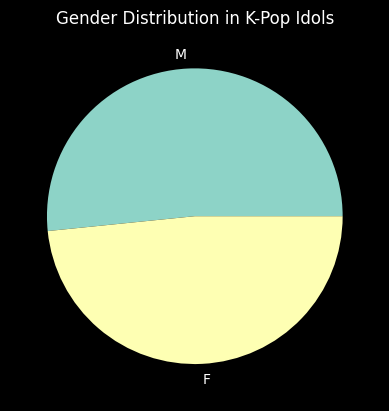

In [36]:
def analyze_idol_gender(dataset, column_name_key: str): 
	"""
		Analyze the genders. 

		Parameters: 
			dataset: the dataset containing names
			column_name_key: (str) the key of the column containing the names
		Returns: none
	"""

	# Get the specific data. 
	gender = dataset[column_name_key]

	# Count unique. 
	gender_count = count_unique(gender, 'gender')

	# Draw the graphs. 
	graph_create('pie', True, 'Gender Distribution in K-Pop Idols', gender_count.keys(), gender_count.values())

analyze_idol_gender(database['kpop_idols'], 'Gender')

### Country
Not to be racist, but where do these idols come from? 

,country,count,percentage
0,South Korea,1204,91.908397
2,China,39,2.977099
3,Japan,27,2.061069
1,USA,14,1.068702
4,Thailand,6,0.458015
6,Taiwan,6,0.458015
9,Canada,5,0.381679
8,Hong Kong,4,0.305344
7,Indonesia,2,0.152672
5,Australia,1,0.076336


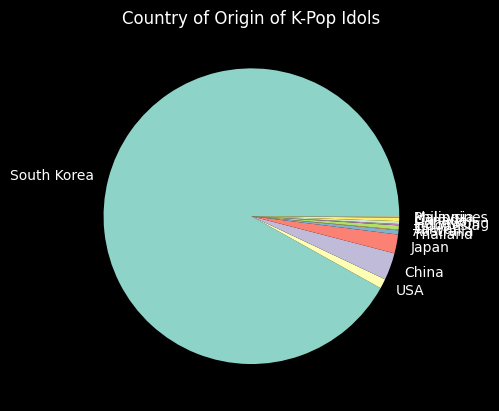

In [37]:
def analyze_idol_country(dataset, column_name_key: str): 
	"""
		Analyze the country of origin of the K-Pop idols. 

		Parameters: 
			dataset: the dataset containing names
			column_name_key: (str) the key of the column containing the names
		Returns: none
	"""

	# Get the specific data. 
	country = dataset[column_name_key]

	# Count unique. 
	country_count = count_unique(country, 'country')

	# Draw the graphs. 
	graph_create('pie', True, 'Country of Origin of K-Pop Idols', country_count.keys(), country_count.values())

analyze_idol_country(database['kpop_idols'], 'Country')

### Method of Participation
Some K-Pop idols do it in one group, and some sometimes do it one group after another. How many did which? 

,Number of Groups,count,percentage
0,1,1101,84.045802
1,2,209,15.954198


{'1': 1101, '2': 209}

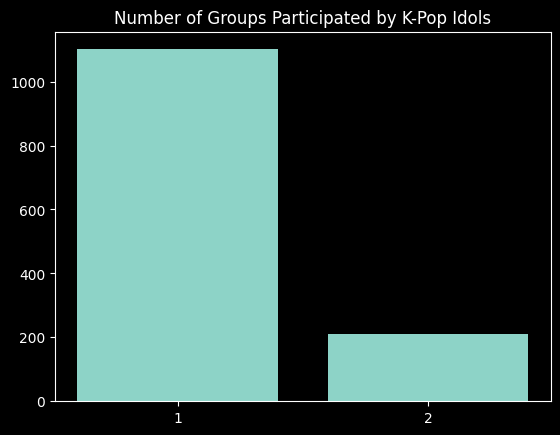

In [49]:
def analyze_idol_group(dataset: dict):
	"""
		Analyze how many k-pop idols joined no, one, or two groups. 

		Parameters: 
			dataset: (dict) the dataset containing groupings. 
		Returns: none
	"""

	# Generate the placeholder for the membership participation count.
	idol_group_count_raw = [] 

	# Populate the list of membership participation per idol in the entry. 
	idol_group_main = dataset['Group']
	idol_group_secondary = dataset['Other Group']

	# Find out how many groups. 
	for idol_index in range(len(dataset['Korean Name'])): 
		idol_group_status = ['str' in str(type(sector)) for sector in [idol_group_main[idol_index], idol_group_secondary[idol_index]]]

		# Count it up. 
		idol_group_count_participation = (list(collections.Counter(idol_group_status).values()))[0]

		# Add to list. 
		idol_group_count_raw.append(int(idol_group_count_participation))

	# Convert to proper data. 
	idol_group_count_raw = count_unique(idol_group_count_raw, 'Number of Groups')
	idol_group_count = {}
	for idol_group_number in idol_group_count_raw.keys(): 
		idol_group_count[str(idol_group_number)] = idol_group_count_raw[idol_group_number]

	# Display the results. 
	output_display(idol_group_count)

	# Generate the graph. 
	graph_create('bar', True, 'Number of Groups Participated by K-Pop Idols', idol_group_count.keys(), idol_group_count.values())
	
analyze_idol_group(database['kpop_idols'])